In [1]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
path_to_augmented_dataset = "F:\\2022-2023\\SEM 1\\CV\\Dataset_1\\Augmented\\"
print(path_to_augmented_dataset)
temp = ['Bowlegs', 'Knock-knee', 'Normal Knee']

F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\


In [3]:
final = pd.DataFrame()
c = 0
for i in temp:
    path_to_folder = path_to_augmented_dataset+i
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+"\\"+fname
        img = cv2.imread(path_to_file)
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img, None)
        out1 = pd.DataFrame(descriptors)
        csv_data = out1.to_csv(r'SIFT\SIFT_{}.csv'.format(i), mode='a', index=False)

In [4]:
def read_data(path):
    data = pd.read_csv(path, dtype='uint8')
    return data.astype(np.uint8)

In [5]:
p0 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\SIFT\SIFT_Bowlegs.csv'
p1 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\SIFT\SIFT_Knock-knee.csv'
p2 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\SIFT\SIFT_Normal Knee.csv'


data1 = data_f = read_data(p0)
print(data1)
data2 = read_data(p1)
print(data2)
data3 = read_data(p2)
print(data3)

# data_f = data_f.append(data2)
# data_f = data_f.append(data3)
# # csv_data = data_f.to_csv('SIFT\SIFT_FINAL.csv', mode='w', index=False)
# print("data_f = ",data_f)

        0    1   2   3    4    5   6  7    8    9  ...  118  119  120  121  \
0       0    0   0   2  136   28   0  0   21    6  ...    0   30   31    0   
1       0    0   0   6   43    0   0  0   11    0  ...    1    5  133   38   
2       0    1   2   5  101  127   0  0   87   24  ...    0    7   22    6   
3       0    0   0   2  143   22   0  0   26    0  ...    0    8   32    1   
4       0    0   0   5   30    1   0  0    5    0  ...    0    0  144   18   
...    ..  ...  ..  ..  ...  ...  .. ..  ...  ...  ...  ...  ...  ...  ...   
71709  95  136  36   1    5    4   0  0   16  105  ...    0    0    0    0   
71710   0    0   0   0    0    0   0  0    0    6  ...    2   21   29    7   
71711   1    3  10  58   54   19   5  1   68   35  ...    0    0    0    0   
71712   8    3   4   9   12    2   0  0  145   13  ...  145   85    0    0   
71713   0    0   1   4   21   64  37  3   29    1  ...    0    0    0    0   

       122  123  124  125  126  127  
0        0    0    0    0

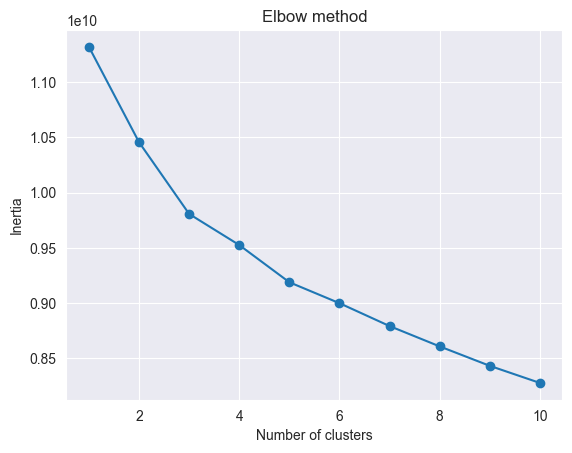

In [13]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data3)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
#performing kmeans on each class
#apple
kmeans1 = KMeans(n_clusters=6) # 5 or 6
kmeans1.fit(data1)

#mango
kmeans2 = KMeans(n_clusters=6)
kmeans2.fit(data2)

#papaya
kmeans3 = KMeans(n_clusters=6) # 5 or 6
kmeans3.fit(data3)


KMeans(n_clusters=6)

In [7]:
import pickle

with open("model1.pkl", "wb") as f:
    pickle.dump(kmeans1, f)
with open("model2.pkl", "wb") as f:
    pickle.dump(kmeans2, f)
with open("model3.pkl", "wb") as f:
    pickle.dump(kmeans3, f)

In [8]:
#histograms of all the classes

# hist1=np.histogram(kmeans1.labels_,bins=200)
# hist2=np.histogram(kmeans2.labels_,bins=200)
# hist3=np.histogram(kmeans3.labels_,bins=200)
#
# print('histogram of apples')
# print(hist1,"\n")
#
# print('histogram of mango')
# print(hist2,"\n")
#
# print('histogram of papaya')
# print(hist3,"\n")

histogram of apples
(array([ 349,  296,  358,  484,  249,  454,  251,  493,  339,  443,  959,
        434,  223,  293,  577,  964,  289,  248,  260,  347,  398,  254,
        284,  350,  315,  473, 1042,  258,  293,  320,  291,  440,  402,
        354,  303,  356,  264,  336,  364,  271,  542,  288,  233,  505,
        242,  169,  264,  490,  329,  268,  188,  293,  268,  741,  301,
        551,  795,  417,  367,  476,  273,  406,  343,  416,  247,  562,
        533,  230,  331,  229,  400,  356,  319,  305,  395,  299,  360,
        448,  536,  173,  341,  382,  265,  281,  309,  477,  235,  261,
        326,  327,  195,  325,  239,  685,  213,  440,  255,  194,  283,
        348,  283,  265,  252,  232,  310,  434, 1538,  289,  551,  375,
        238,  271,  475,  338,  258,  266,  290,  586,  430,  294,  231,
        267,  204,  325,  427,  335,  333,  190,  257,  262,  202,  299,
        429,  273,  396,  264,  628,  326,  379,  312,  408,  379,  268,
        302,  294,  271,  329,

In [7]:
final = pd.DataFrame()
c = 0

for i in temp:
    data = []
    path_to_folder = path_to_augmented_dataset+i
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+"\\"+fname
        img = cv2.imread(path_to_file)
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img, None)
        out1 = pd.DataFrame(descriptors)
        array_double = np.array(out1, dtype=np.double)
        if i == temp[0]:
            # print("model 1")
            a=kmeans1.predict(array_double)
        elif i == temp[1]:
            # print("model 2")
            a = kmeans2.predict(array_double)
        else:
            # print("model 3")
            a = kmeans3.predict(array_double)
        hist=np.histogram(a,bins=6)
        data.append(hist[0])
        # csv_data = out1.to_csv(r'SIFT\SIFT_{}.csv'.format(i), mode='a', index=False)
    Output = pd.DataFrame(data)
    Output["Class"] = c
    csv_data=Output.to_csv(r'SIFT\SIFT_FINAL_{}.csv'.format(i), mode='a', index=False)
    c += 1

C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warni

In [8]:
pf0 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\SIFT\SIFT_FINAL_Bowlegs.csv'
pf1 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\SIFT\SIFT_FINAL_Knock-knee.csv'
pf2 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\SIFT\SIFT_FINAL_Normal Knee.csv'
pfd = 'SIFT\SIFT_FINAL.csv'
# pf = 'SIFT\SIFT_FINAL.csv'
d1 = fd =  read_data(pf0)
print(d1)
d2 = read_data(pf1)
print(d2)
d3 = read_data(pf2)
print(d3)
fd = fd.append(d2)
fd = fd.append(d3)
print(fd)
csv_data=fd.to_csv(pfd, mode='a', index=False)

      0   1   2   3   4   5  Class
0    10  13  19   7   0   5      0
1     9  14  13   8   0   7      0
2    13   3   8  11   0   6      0
3    12  11  10  13   0   7      0
4    18  13   9  15   0   4      0
..   ..  ..  ..  ..  ..  ..    ...
955   8  17   2   7   0   8      0
956   2   0  15   0  27   2      0
957  20  12   7  26   0  17      0
958  17  13   5   8   0   7      0
959   1   8   1   7   0   5      0

[960 rows x 7 columns]
       0   1   2   3  4   5  Class
0     31  24  18   5  0  10      1
1     39  14  11   6  0  18      1
2     25  24  23  16  0  19      1
3     11  22   7  14  0   8      1
4     14   5  13  10  0   7      1
...   ..  ..  ..  .. ..  ..    ...
999    9   4   5   6  0   5      1
1000  33  27  10  18  0   4      1
1001  11   8   7   4  0   8      1
1002  11   4   3   7  0   9      1
1003  32  18  16  16  0  15      1

[1004 rows x 7 columns]
      0   1  2   3   4   5  Class
0    14   5  0   3  11  24      2
1    20   7  0   5  12   6      2
2    20  

C:\Users\neilk\AppData\Local\Temp\ipykernel_15876\4172764484.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fd = fd.append(d2)
C:\Users\neilk\AppData\Local\Temp\ipykernel_15876\4172764484.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fd = fd.append(d3)


In [9]:
data = read_data(pfd)
X = data.iloc[:, :-1]
print(X)
Y = data.iloc[:, -1]
print(Y)

# train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=5)
print(train_X)
print(test_X)

       0   1   2   3   4   5
0     10  13  19   7   0   5
1      9  14  13   8   0   7
2     13   3   8  11   0   6
3     12  11  10  13   0   7
4     18  13   9  15   0   4
...   ..  ..  ..  ..  ..  ..
2896  26  39   0  21  57  26
2897  11   9   0   9  10   8
2898  18   5   0   5   5  13
2899  12  10   0  20  51  33
2900  36   8   0  17  22  16

[2901 rows x 6 columns]
0       0
1       0
2       0
3       0
4       0
       ..
2896    2
2897    2
2898    2
2899    2
2900    2
Name: Class, Length: 2901, dtype: uint8
       0   1   2   3   4   5
1293  32  24  23   7   0  21
2846   5  27   0  35  52  26
2582  14   7   0   2   4  20
919   26   3  11  16   0  14
428   19  34   7  16   0  23
...   ..  ..  ..  ..  ..  ..
1032  38  16  24  10   0  21
2121  21   6   0   9  23  17
1424  11  13   8   9   0   7
1725  12  11   7  10   0   5
2254  12   2   0   6   6  11

[2320 rows x 6 columns]
       0   1   2   3  4   5
219   15  13   1   9  0   9
2383  11   8   0  14  8   9
975   12  19  23  20

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

# KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(train_X, train_Y)
print(classifier)

KNeighborsClassifier()


In [12]:
y_pred = classifier.predict(test_X)

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(test_Y, y_pred)
ac = accuracy_score(test_Y,y_pred)
print(cm)
print(ac)

[[144  40   3]
 [ 54 148   1]
 [  0   1 190]]
0.8296041308089501


# XgBoost

In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
model = XGBClassifier()
# sc = StandardScaler()
# train_X_xgboost = sc.fit_transform(train_X)
# test_X_xgboost = sc.transform(test_X)
model.fit(train_X, train_Y)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


In [15]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
# evaluate predictions
accuracy = accuracy_score(test_Y, y_pred)
print(accuracy)

0.8657487091222031


# SVM

In [16]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
classifier_SVM = SVC(kernel='poly')
# classifier_SVM = SVC(kernel='sigmoid')
# classifier_SVM = SVC(kernel='linear')

# sc = StandardScaler()
# train_X_SVM = sc.fit_transform(train_X)
# test_X_SVM = sc.transform(test_X)

In [17]:
classifier_SVM.fit(train_X, train_Y)

SVC(kernel='poly')

In [18]:
predictions = classifier_SVM.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
ac = accuracy_score(test_Y,predictions)
print(cm)
print(ac)

[[107  76   4]
 [ 16 186   1]
 [  2   0 189]]
0.8296041308089501


In [19]:
classifier_SVM2 = SVC(kernel='sigmoid')
classifier_SVM2.fit(train_X, train_Y)
predictions2 = classifier_SVM2.predict(test_X)
cm2 = confusion_matrix(test_Y, predictions2)
ac2 = accuracy_score(test_Y,predictions2)
print(cm2)
print(ac2)

[[102  78   7]
 [ 82 118   3]
 [ 14   4 173]]
0.6764199655765921


In [20]:
classifier_SVM = SVC(kernel='linear')
classifier_SVM.fit(train_X, train_Y)
predictions = classifier_SVM.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
ac = accuracy_score(test_Y,predictions)
print(cm)
print(ac)

[[118  65   4]
 [ 47 156   0]
 [  0   0 191]]
0.8003442340791739


In [21]:
classifier_SVM = SVC(kernel='rbf')
classifier_SVM.fit(train_X, train_Y)
predictions = classifier_SVM.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
ac = accuracy_score(test_Y,predictions)
print(cm)
print(ac)

[[135  48   4]
 [ 37 165   1]
 [  0   0 191]]
0.8450946643717728


# Naive Bayes

In [22]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(train_X, train_Y)

BernoulliNB()

In [23]:
y_pred_ts = classifier.predict(test_X)
test_data_accuracy = accuracy_score(y_pred_ts, test_Y)
print(test_data_accuracy)

0.7211703958691911
